In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
datasets = ['anscombe', 'attention', 'brain_networks', 'car_crashes',
 'diamonds', 'dots', 'exercise', 'flights', 'fmri',
 'iris', 'penguins', 'tips', 'titanic']

In [6]:
for data in datasets:
    print(sns.load_dataset(data).shape, data)

(44, 3) anscombe
(60, 5) attention
(923, 63) brain_networks
(51, 8) car_crashes
(53940, 10) diamonds
(848, 5) dots
(90, 6) exercise
(144, 3) flights
(1064, 5) fmri
(150, 5) iris
(344, 7) penguins
(244, 7) tips
(891, 15) titanic


In [8]:
diamond = sns.load_dataset("diamonds").sample(2000)

In [10]:
titanic = sns.load_dataset("titanic")

In [13]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
titanic.isna().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [16]:
df = pd.read_csv('codio_8_7_solution/data/train.csv')
df.shape

(1460, 81)

In [24]:
df.isna().mean().sort_values(ascending = False)\
.to_frame().rename(columns = {0: "pct"}).query("pct > 0.3")

,pct
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603


In [34]:
diamond_nums = diamond.select_dtypes(include =[int, float])

In [35]:
diamond_nums.var()

carat    2.317506e-01
depth    2.197710e+00
table    4.758413e+00
price    1.691410e+07
x        1.296702e+00
y        1.276028e+00
z        4.981391e-01
dtype: float64

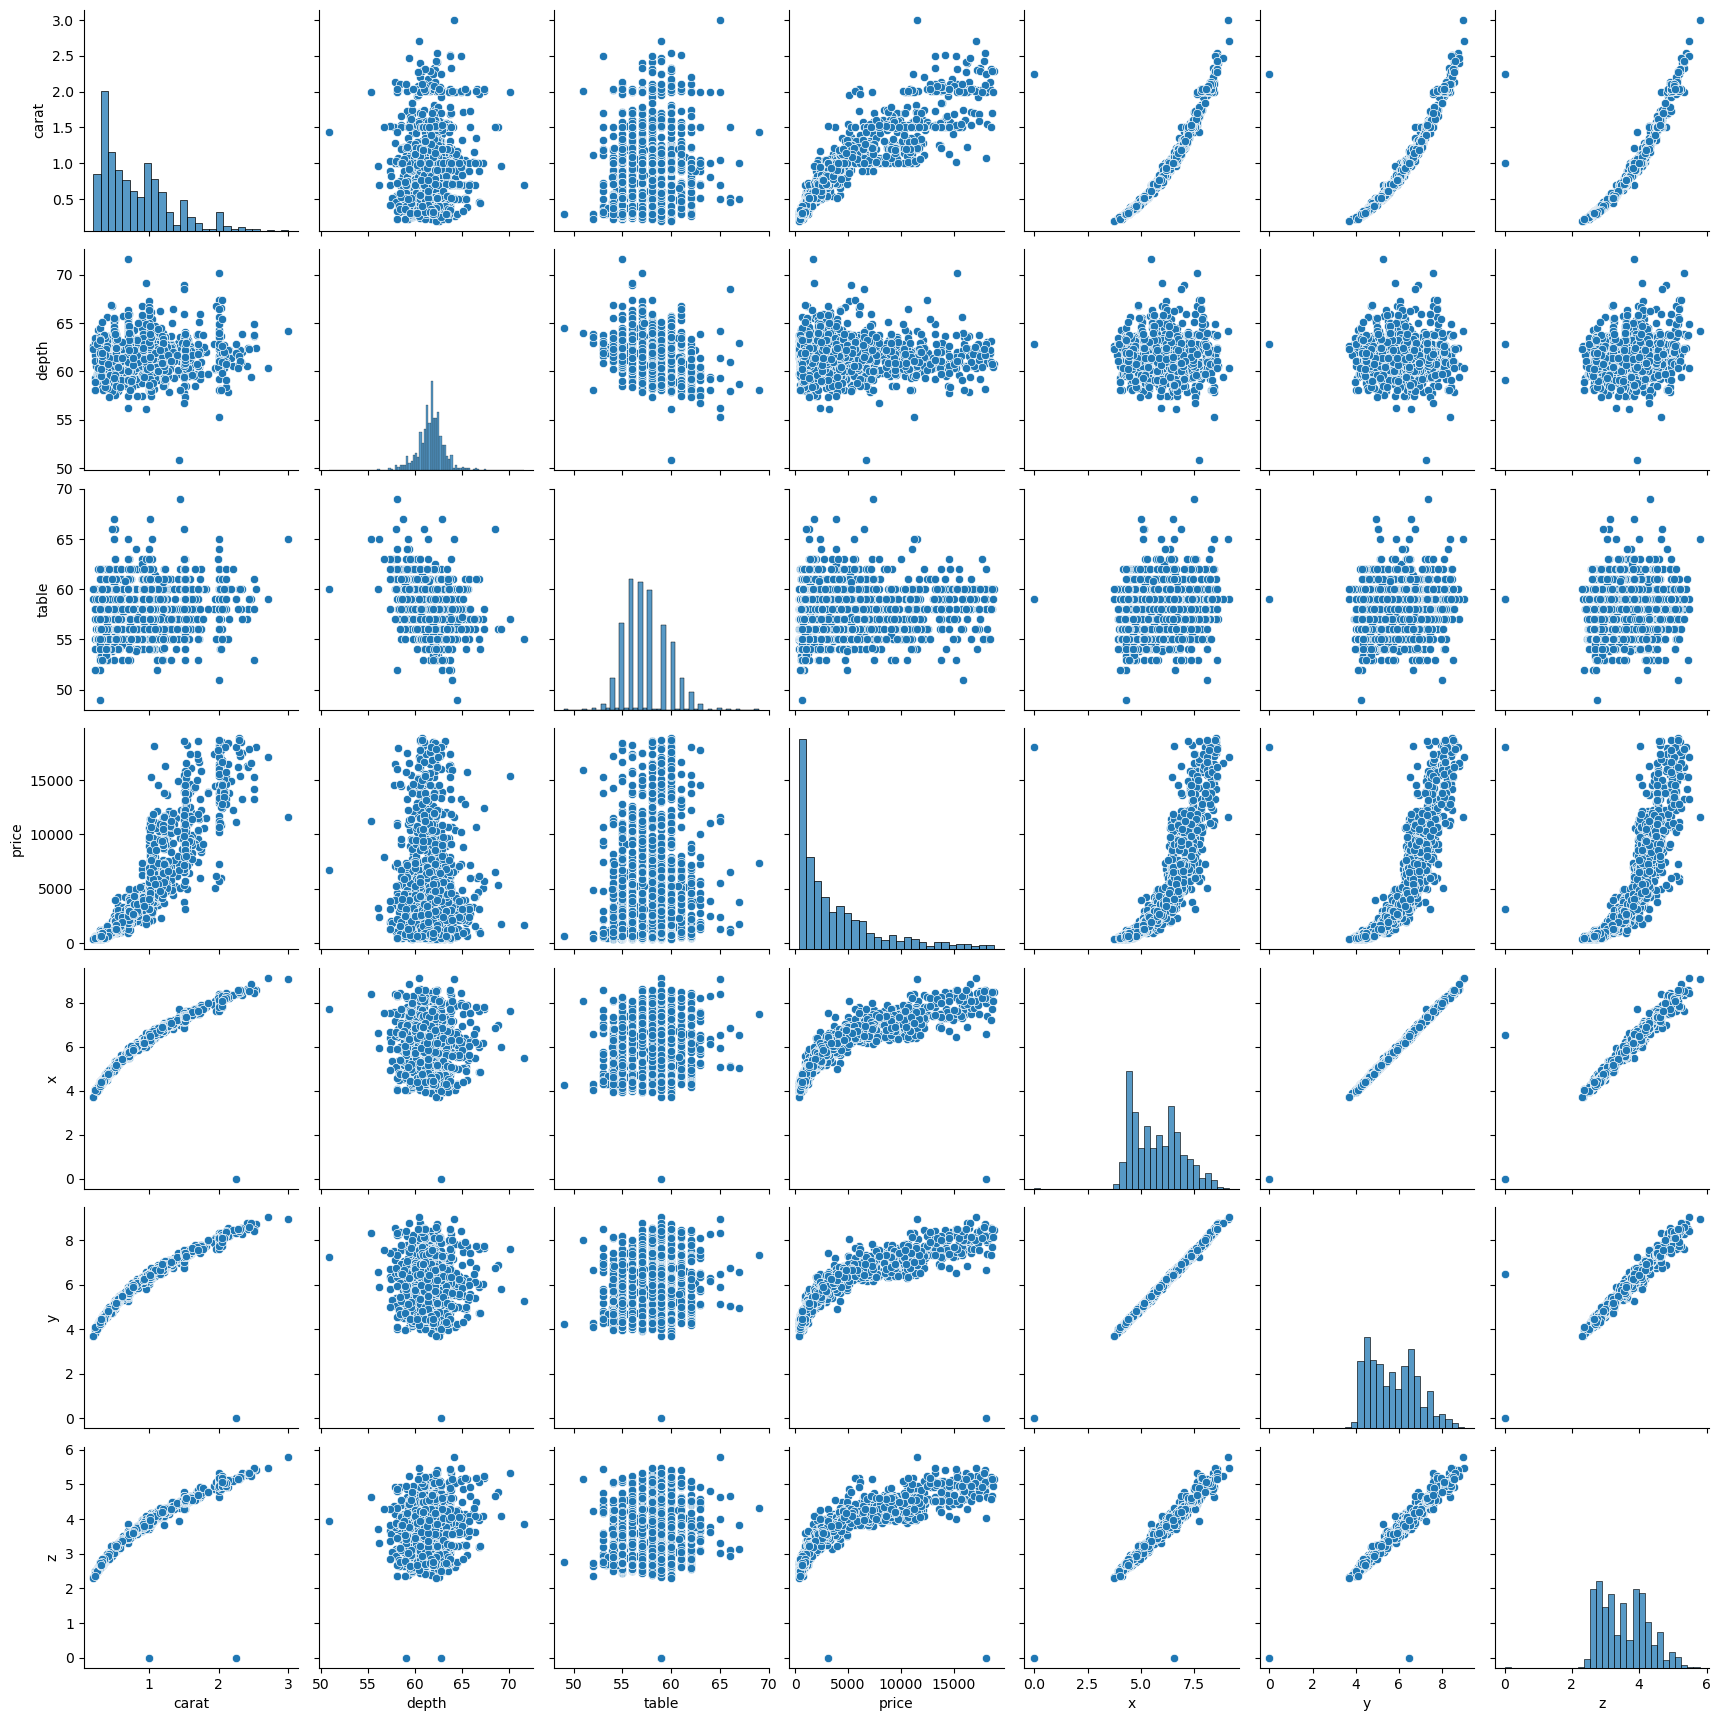

In [36]:
sns.pairplot(diamond_nums)

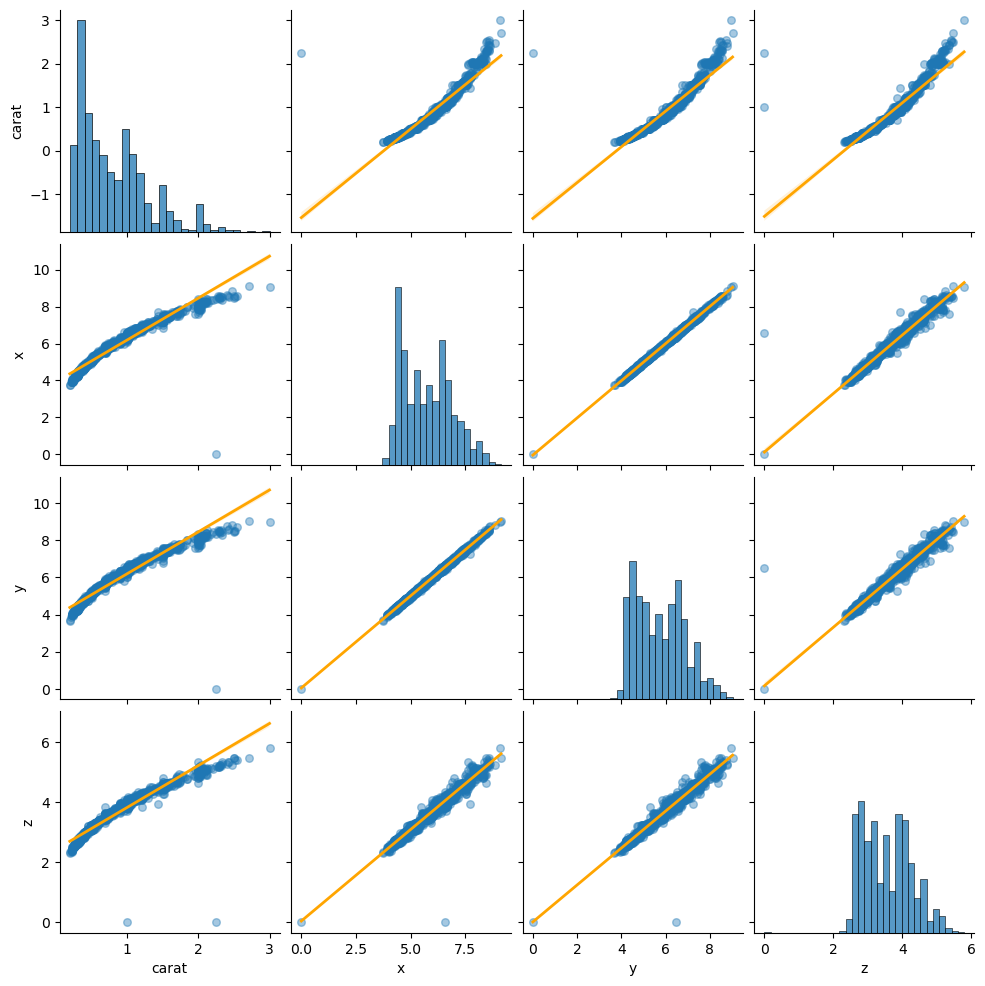

In [39]:
sns.pairplot(diamond_nums, vars= ["carat", "x", "y", "z"], kind="reg",
             plot_kws={"scatter_kws": {"alpha": .4, 's': 30},
                       "line_kws": {"color": "orange", "lw": 2}})

In [40]:
diamond_nums.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.013207,0.224900,0.917546,0.962232,0.961198,0.954723
depth,0.013207,1.000000,-0.285931,-0.040326,-0.050030,-0.053345,0.081529
table,0.224900,-0.285931,1.000000,0.169943,0.227754,0.222281,0.185188
price,0.917546,-0.040326,0.169943,1.000000,0.869120,0.870247,0.857255
x,0.962232,-0.050030,0.227754,0.869120,1.000000,0.998944,0.983160
y,0.961198,-0.053345,0.222281,0.870247,0.998944,1.000000,0.982918
z,0.954723,0.081529,0.185188,0.857255,0.983160,0.982918,1.000000


<Axes: >

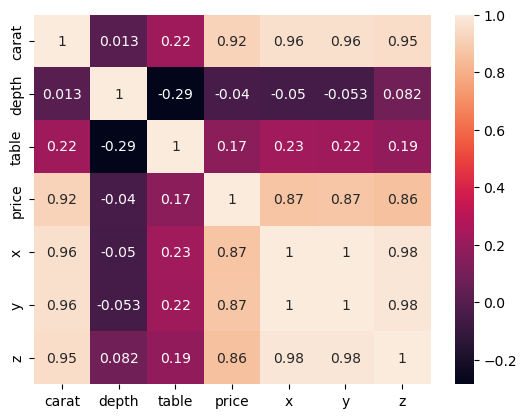

In [41]:
sns.heatmap(diamond_nums.corr(), annot=True)

In [45]:
diamond_nums.corr()["price"].abs().sort_values(ascending=False)

price    1.000000
carat    0.917546
y        0.870247
x        0.869120
z        0.857255
table    0.169943
depth    0.040326
Name: price, dtype: float64

<Axes: >

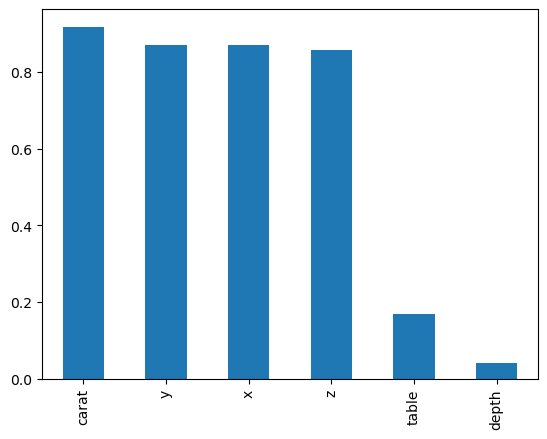

In [47]:
diamond_nums.corr()["price"].abs().sort_values(ascending=False).iloc[1:].plot(kind="bar")

In [55]:
indexs = df.isna().mean().to_frame().rename(columns={0: "pct_of_nan"}).query("pct_of_nan < .3").index
indexs

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [58]:
df_nums = df[indexs].select_dtypes(include= [int, float])
df_nums

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [63]:
df_corr = df_nums.corr()["SalePrice"]
df_corr = df_corr.to_frame()

In [64]:
df_corr

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420


In [66]:
df_corr["abs"] = df_corr["SalePrice"].abs()
df_corr.sort_values("abs", ascending=False)

,SalePrice,abs
SalePrice,1.000000,1.000000
OverallQual,0.790982,0.790982
GrLivArea,0.708624,0.708624
GarageCars,0.640409,0.640409
GarageArea,0.623431,0.623431
TotalBsmtSF,0.613581,0.613581
1stFlrSF,0.605852,0.605852
FullBath,0.560664,0.560664
TotRmsAbvGrd,0.533723,0.533723
YearBuilt,0.522897,0.522897


In [133]:
df_obj = df[indexs].select_dtypes(include=["object"])
df_obj.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [139]:
columns = []
num_counts = []
for col in df_obj:
    #print(col, len(df_obj.value_counts(col)))
    columns.append(col)
    num_counts.append(len(df_obj.value_counts(col)))

In [144]:
pd.DataFrame([columns, num_counts]).T.sort_values(1)

,0,1
1,Street,2
4,Utilities,2
26,CentralAir,2
31,GarageFinish,3
6,LandSlope,3
34,PavedDrive,3
2,LotShape,4
3,LandContour,4
20,BsmtCond,4
19,BsmtQual,4


In [73]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 6])

In [125]:
x = np.arange(1, 35)

# underlying linear trend + noise
y = 0.8 * x + 2 + np.random.normal(0, 2.0, size=len(x))

In [126]:
coeffs = np.polyfit(x, y, 25)
coeffs

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1937/2618156528.py:1: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 25)


array([-9.60861393e-28,  2.16383286e-25, -1.90174958e-23,  7.14004766e-22,
       -8.55349329e-22, -7.12470310e-19,  7.24914848e-18,  7.36821075e-16,
       -1.11550997e-14, -7.82922350e-13,  1.77292006e-11,  7.36079311e-10,
       -3.11646893e-08, -2.17201077e-07,  4.29639441e-05, -1.46627242e-03,
        2.89782925e-02, -3.85934317e-01,  3.62933529e+00, -2.43810276e+01,
        1.16118390e+02, -3.83253510e+02,  8.42896068e+02, -1.15965984e+03,
        8.91749335e+02, -2.86085509e+02])

In [127]:
line = np.poly1d(coeffs)

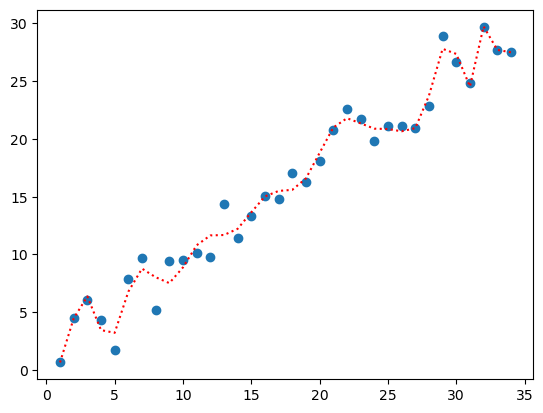

In [128]:
plt.scatter(x, y)
plt.plot(x, line(x), color = "red", linestyle = ":")

In [129]:
print(line)

            25             24             23            22
-9.609e-28 x  + 2.164e-25 x  - 1.902e-23 x  + 7.14e-22 x 
              21             20             19             18
 - 8.553e-22 x  - 7.125e-19 x  + 7.249e-18 x  + 7.368e-16 x 
              17             16             15             14
 - 1.116e-14 x  - 7.829e-13 x  + 1.773e-11 x  + 7.361e-10 x 
              13             12             11            10
 - 3.116e-08 x  - 2.172e-07 x  + 4.296e-05 x  - 0.001466 x 
            9          8         7         6         5         4
 + 0.02898 x - 0.3859 x + 3.629 x - 24.38 x + 116.1 x - 383.3 x
          3        2
 + 842.9 x - 1160 x + 891.7 x - 286.1
